In [7]:
import json
import matplotlib.pyplot as plt
import math
import numpy as np

k_range = (11, 25)
x_axis = [i for i in range(k_range[0], k_range[1] + 1)]
EXPERIMENT_ROUND = 10
file_name = f'result_k_{k_range[0]}_{k_range[1]}.json'
data_structure_names = ['Data structure A', 'Data structure B', 'Data structure C']
experiment_names = ['Insertion', 'Search', 'Traversal']
with open(file_name) as f:
    result_json: dict = json.load(f)

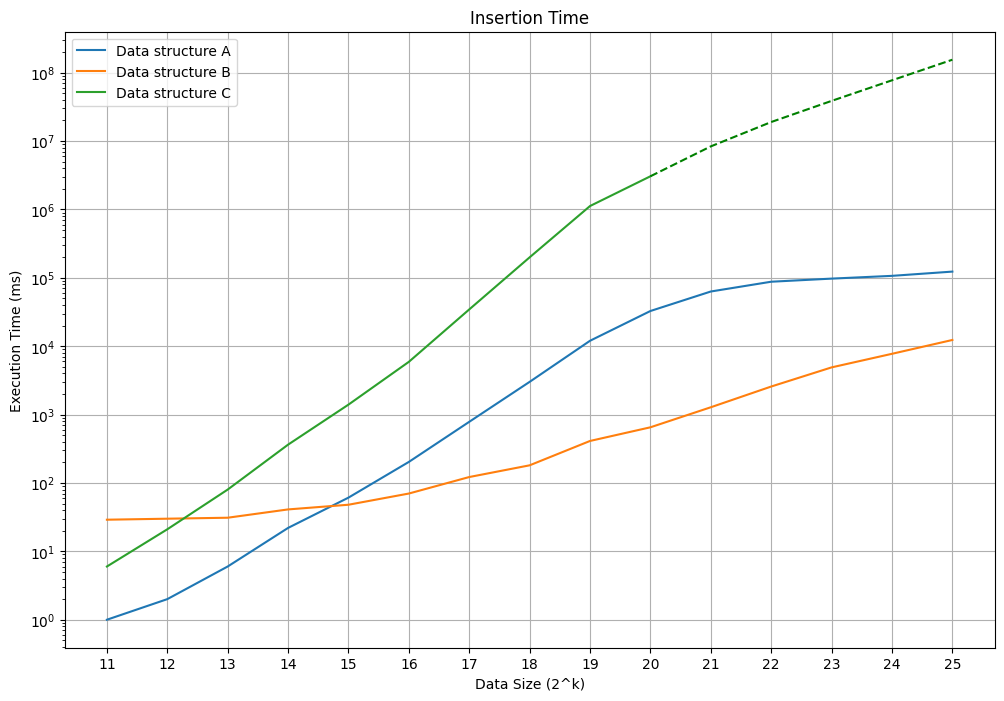

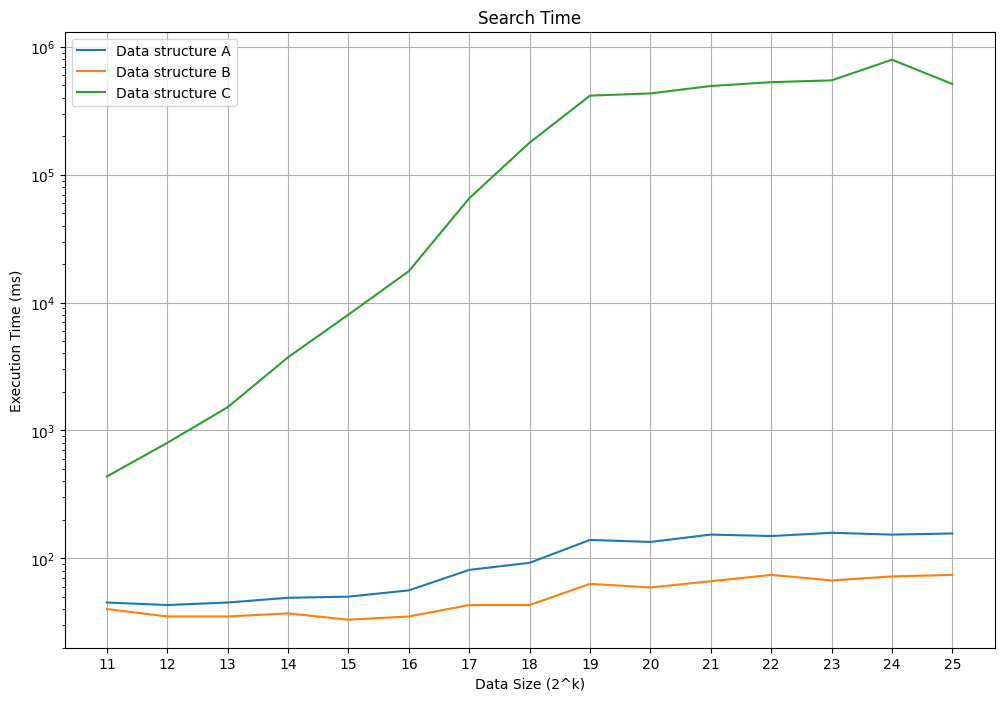

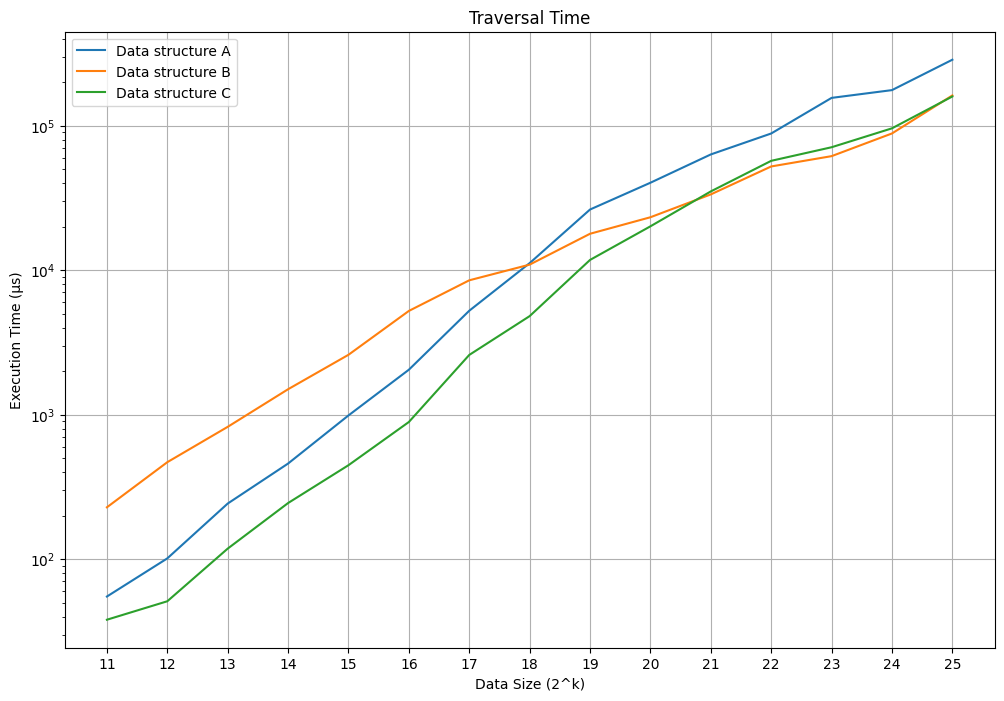

In [22]:
result = [[[] for _ in range(3)] for _ in range(3)]
for i, data_size in enumerate(range(k_range[0], k_range[1] + 1)):
    for j, data_type in enumerate(data_structure_names):
        for experiment_number in range(3):
            sum = 0
            elements = 0
            for experiment_round in range(EXPERIMENT_ROUND):
                try:
                    sum += result_json[f'k={str(data_size)}'][f'round={str(experiment_round + 1)}'][data_type][str(experiment_number + 1)]
                    elements += 1
                except KeyError:
                    break

            if elements > 0:
                average = sum // elements
                result[experiment_number][j].append(average)


for i, experiment_name in enumerate(experiment_names):
    fig, ax = plt.subplots(figsize=(12, 8))
    for j, data_type in enumerate(data_structure_names):
        ax.plot(x_axis[:len(result[i][j])], result[i][j], label=data_type)
    ax.set_title(f'{experiment_name} Time')
    ax.set_xlabel('Data Size (2^k)')
    ax.set_ylabel('Execution Time (ms)')
    ax.set_xticks(x_axis)
    ax.set_yscale('log')
    ax.grid()
    ax.legend()
    if (i == 0):
        ax.plot([i for i in range(20, 25 + 1)], [3047454,8337224,18930502,38553860,77107721,154215443], linestyle='--', color='green')
    elif (i == 2):
        ax.set_ylabel('Execution Time (μs)')


    

    



In [3]:
length_expected_value = []
for i, k in enumerate(range(k_range[0], k_range[1] + 1)):
    n = 2 ** k  
    length_expected_value.append(int(round((2 ** 20) * (1 - (1 - 1 / (2 ** 20)) ** n), 0)))

for i in range(len(length_expected_value)):
    print(f'{i + 11: 3} : {length_expected_value[i]: ,}', end='')
    if i > 0:
        print(f'(x{round(length_expected_value[i] / length_expected_value[i - 1], 4)})')
    else:
        print()
    

 11 :  2,046
 12 :  4,088(x1.998)
 13 :  8,160(x1.9961)
 14 :  16,257(x1.9923)
 15 :  32,261(x1.9844)
 16 :  63,530(x1.9693)
 17 :  123,211(x1.9394)
 18 :  231,944(x1.8825)
 19 :  412,583(x1.7788)
 20 :  662,827(x1.6065)
 21 :  906,667(x1.3679)
 22 :  1,029,371(x1.1353)
 23 :  1,048,224(x1.0183)
 24 :  1,048,576(x1.0003)
 25 :  1,048,576(x1.0)
